# Analisi Diffusione COVID-19

Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset, curato da
Our World in Data, all'indirizzo https://github.com/owid/covid-19-data/tree/master/public/data
alla voce "! Download our complete COVID-19 dataset" scaricare il dataset nel formato che si preferisce.

In [ ]:
# Importo le Librerie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento dataset ufficiale OWID
url = "https://catalog.ourworldindata.org/garden/covid/latest/compact/compact.csv"
df = pd.read_csv(url)

## Si richiede di verificare le dimensioni del dataset e i relativi metadati

In [3]:
# Preview del dataset
df

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
3,Afghanistan,2020-01-04,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547055,Zimbabwe,2025-11-12,266436.0,0.0,0.0,16580.682,0.0,0.0,5740.0,0.0,...,16069061.0,41.538223,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN
547056,Zimbabwe,2025-11-13,266436.0,0.0,0.0,16580.682,0.0,0.0,5740.0,0.0,...,16069061.0,41.538223,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN
547057,Zimbabwe,2025-11-14,266436.0,0.0,0.0,16580.682,0.0,0.0,5740.0,0.0,...,16069061.0,41.538223,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN
547058,Zimbabwe,2025-11-15,266436.0,0.0,0.0,16580.682,0.0,0.0,5740.0,0.0,...,16069061.0,41.538223,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN


In [4]:
# Dimensioni
df.shape

(547060, 61)

In [5]:
# Struttura del dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547060 entries, 0 to 547059
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   country                                     547060 non-null  object 
 1   date                                        547060 non-null  object 
 2   total_cases                                 533856 non-null  float64
 3   new_cases                                   530308 non-null  float64
 4   new_cases_smoothed                          529099 non-null  float64
 5   total_cases_per_million                     533856 non-null  float64
 6   new_cases_per_million                       530308 non-null  float64
 7   new_cases_smoothed_per_million              529099 non-null  float64
 8   total_deaths                                533856 non-null  float64
 9   new_deaths                                  531235 non-null  float64
 

,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,new_deaths_smoothed,total_deaths_per_million,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
count,5.338560e+05,5.303080e+05,5.290990e+05,533856.000000,530308.000000,529099.000000,5.338560e+05,531235.000000,530023.000000,533856.000000,...,5.296120e+05,521031.000000,523180.000000,525324.000000,427346.000000,350691.000000,461695.000000,248104.000000,330975.000000,0.0
mean,1.437181e+07,1.025189e+04,1.027536e+04,132365.473829,96.117491,96.340884,1.560401e+05,97.938788,98.164868,933.350731,...,1.316652e+08,378.207027,31.167570,73.446812,22490.131588,14.029640,9.060532,59.247941,3.181416,NaN
std,7.442564e+07,1.157179e+05,9.882474e+04,176083.711895,965.725633,497.568729,7.803317e+05,793.172509,730.562992,1186.123100,...,6.689633e+08,1720.800694,9.665285,7.656692,22538.867173,20.825215,5.236865,31.878619,2.566310,NaN
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,5.130000e+02,0.136470,14.298000,18.817699,708.178284,0.000000,1.100000,3.440189,0.300000,NaN
25%,9.515000e+03,0.000000e+00,0.000000e+00,3032.735400,0.000000,0.000000,7.400000e+01,0.000000,0.000000,44.103690,...,4.553740e+05,36.265862,22.243999,68.748703,5155.620117,0.452137,5.600000,26.200474,1.320000,NaN
50%,8.847300e+04,0.000000e+00,4.000000e+00,50682.260000,0.000000,0.703198,1.024000e+03,0.000000,0.000000,402.215200,...,6.035104e+06,92.084663,31.683001,74.695999,14572.607422,2.718295,7.400000,70.153603,2.600000,NaN
75%,1.084295e+06,5.300000e+01,1.798571e+02,196518.080000,6.125418,29.360855,1.270700e+04,0.000000,1.714286,1464.534050,...,2.971544e+07,237.470367,39.080002,78.768799,34663.496094,21.365259,11.100000,88.469353,4.260000,NaN
max,7.788527e+08,8.401906e+06,6.402033e+06,769806.800000,230762.550000,37463.746000,7.102566e+06,57167.000000,14820.714000,6603.648000,...,8.021407e+09,21344.242188,59.875000,85.746399,117746.992188,85.317673,30.799999,100.000000,13.800000,NaN


In [7]:
# Valori nulli. 
# Ho aggiunto sum() perchè altrimenti i risultati sarebbero stati booleani
df.isna().sum().sort_values(ascending=False)

human_development_index                    547060
weekly_icu_admissions                      536067
weekly_icu_admissions_per_million          536067
excess_mortality_cumulative_per_million    533357
excess_mortality                           533323
                                            ...  
total_cases_per_million                     13204
total_deaths                                13204
total_deaths_per_million                    13204
date                                            0
country                                         0
Length: 61, dtype: int64

## Si chiede di trovare, per ogni continente:

### a. il numero di casi fin dall'inizio della pandemia

In [8]:
# Prendo l'ultimo valore di total_cases per ogni paese (quello più aggiornato)
latest_cases = (df.sort_values("date").groupby("country").tail(1))

# Sommo i casi finali raggruppando per continente
cases_per_continent = latest_cases.groupby("continent")["total_cases"].sum()

cases_per_continent.sort_values(ascending=False)


continent
Asia             173535282.0
Africa             5890996.0
North America       932303.0
South America       630183.0
Oceania             274683.0
Europe              139751.0
Name: total_cases, dtype: float64

### b. la percentuale rispetto al totale mondiale del numero di casi

In [10]:
# Totale mondiale dei casi
total_world = latest_cases["total_cases"].sum()

# Percentuale dei casi per continente
percent_per_continent = (cases_per_continent / total_world) * 100

percent_per_continent.sort_values(ascending=False)

continent
Asia             3.586170
Africa           0.121740
North America    0.019266
South America    0.013023
Oceania          0.005676
Europe           0.002888
Name: total_cases, dtype: float64

## Selezionare i dati relativi all'Italia nel 2022 e, poiché i nuovi casi vengono registrati settimanalmente, filtrare via i giorni che non hanno misurazioni; quindi mostrare con dei grafici adeguati:

### a. l'evoluzione del casi totali dall'inizio alla fine dell'anno

In [11]:
# Controllo il tipo di dato della colonna date perchè mi dava errore
df["date"].dtype

dtype('O')

In [12]:
# La colonna date è un object, quindi la converto in datetime
df["date"] = pd.to_datetime(df["date"])

In [13]:
df["date"].dtype

dtype('<M8[ns]')

<Axes: title={'center': 'Casi totali in Italia nel 2022'}, xlabel='date'>

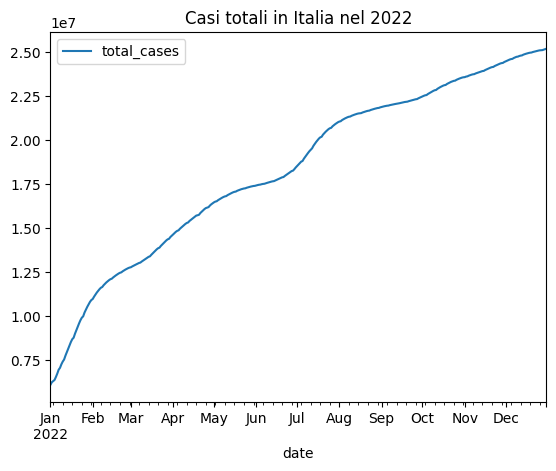

In [14]:
# Filtro Italia
italy = df[df["country"] == "Italy"]

# Filtro anno 2022
italy_2022 = italy[italy["date"].dt.year == 2022]

# Tolgo i giorni senza misurazioni
italy_2022_clean = italy_2022.dropna(subset=["new_cases"])

# Grafico dei casi totali nel 2022
italy_2022_clean.plot(
    x="date", y="total_cases",title="Casi totali in Italia nel 2022")

### b. il numero di nuovi casi rispetto alla data

<Axes: title={'center': 'Nuovi casi in Italia nel 2022'}, xlabel='date'>

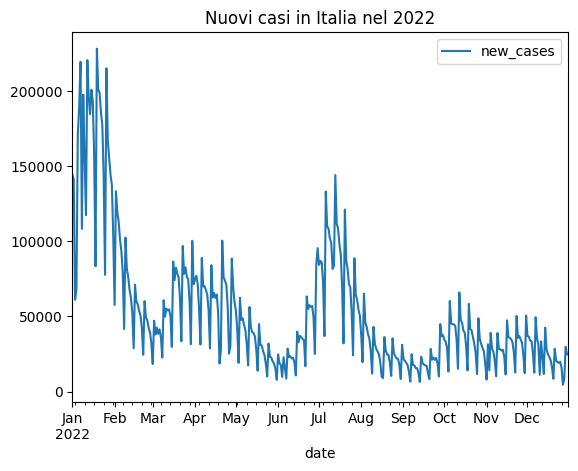

In [15]:
italy_2022_clean.plot(x="date", y="new_cases", title="Nuovi casi in Italia nel 2022")


## Riguardo le nazioni di Italia, Germania e Francia:

### a. mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU,considerare quindi la colonna icu_patients) da maggio 2022 (incluso) ad aprile 2023 (incluso)

Text(0.5, 1.0, 'ICU patients May 2022 to April 2023')

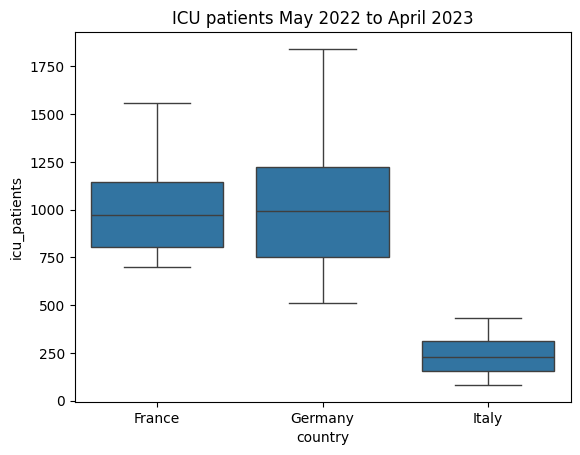

In [16]:
# Prendo solo Italia, Germania e Francia
icu_countries = df[df["country"].isin(["Italy", "Germany", "France"])]

# Tengo solo le date da maggio 2022 fino ad aprile 2023
icu_period = icu_countries[(icu_countries["date"] >= "2022-05-01") & (icu_countries["date"] <= "2023-04-30")]

# Boxplot per vedere le differenze
sns.boxplot(data=icu_period, x="country", y="icu_patients")
plt.title("ICU patients May 2022 to April 2023")

### b. scrivere un breve commento (una o due righe) riguardo che conclusioni possiamo trarre osservando il grafico risultante

Posso notare immediatamente che l'Italia ha avuto meno persone in terapia intensiva (~300),
mentre Francia e Germania purtroppo, hanno avuto più pazienti in terapia intensiva (~750-1240)

## Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2021:

### a. mostrare, in maniera grafica oppure numerica, la somma dei pazienti ospitalizzati per ognuna (colonna hosp_patients)

In [18]:
df[df["country"].isin(["Italy","Germany","France","Spain"]) & 
(df["date"].dt.year == 2021)].groupby("country")["hosp_patients"].sum().sort_values(ascending=False)

country
France     6008717.0
Italy      4419950.0
Spain      2411706.0
Germany          0.0
Name: hosp_patients, dtype: float64

### b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno

In [19]:
df[df["country"].isin(["Italy","Germany","France","Spain"]) & 
   (df["date"].dt.year == 2021)]["hosp_patients"].isna().sum()


np.int64(365)

Ho controllato e ci sono diversi valori nulli (365). 
In questo caso non penso sia corretto sostituirli, perché non sappiamo quanti pazienti ospedalizzati c’erano davvero in quei giorni. 
Quindi è meglio lasciarli nulli invece di mettere numeri inventati.